## 1. Data Exploration and Visualization
### Preparation work

In [61]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Read and display the data
df = pd.read_csv("Melbourne_housing.csv")
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.75410,145.00880,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.74450,144.94710,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.91630,145.07790,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.83590,144.98390,Southern Metropolitan,14887
5,Burwood East,14 Kalista Ct,4,h,NaN,PN,Woodards,9/12/2017,14.7,3151,...,2.0,2.0,570.0,NaN,NaN,Whitehorse City Council,-37.85794,145.15478,Eastern Metropolitan,4048
6,Prahran,7 Trinian St,3,h,2400000.0,VB,Marshall,6/1/2018,4.6,3181,...,2.0,NaN,NaN,NaN,NaN,Stonnington City Council,-37.85231,145.00146,Southern Metropolitan,7717
7,Fairfield,250 Arthur St,3,h,1145000.0,S,McGrath,28/08/2016,5.8,3078,...,1.0,3.0,590.0,NaN,NaN,Darebin City Council,-37.76730,145.02100,Northern Metropolitan,2970
8,Hoppers Crossing,23 Cleveland Dr,3,h,530000.0,S,hockingstuart,3/6/2017,18.4,3029,...,2.0,2.0,530.0,NaN,NaN,Wyndham City Council,-37.86515,144.66671,Western Metropolitan,13830
9,Dandenong,1/54 Jones Rd,2,u,433000.0,S,Stockdale,28/10/2017,24.7,3175,...,NaN,NaN,NaN,NaN,NaN,Greater Dandenong City Council,NaN,NaN,South-Eastern Metropolitan,10894


### Distribution of price

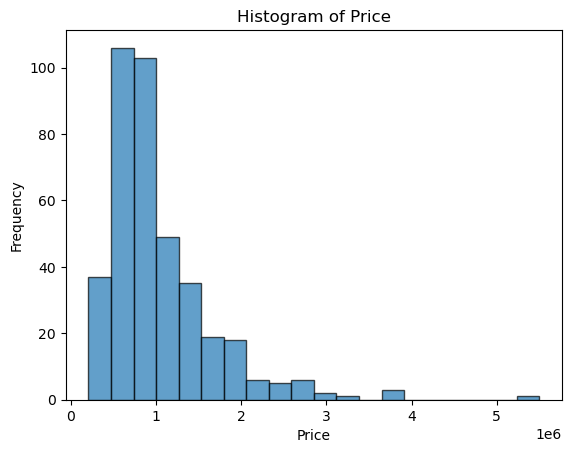

In [63]:
# Draw the histogram of price
plt.hist(df['Price'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The distribution of price is right-skewed. Most prices are concentrated between 250,000 and 2,000,000 Australian dollars. 

### Distribution of house type

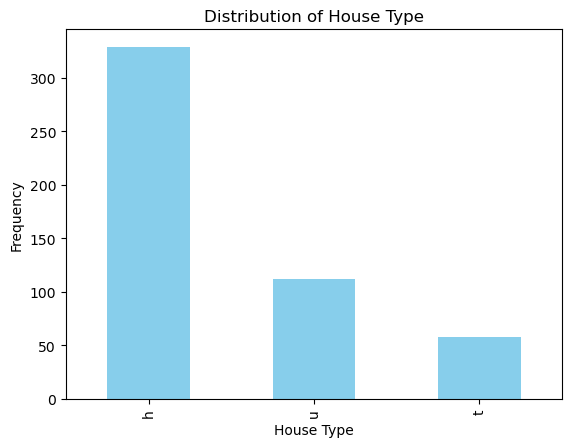

In [64]:
# Count the number of each house type
counts = df['Type'].value_counts()

# Draw barplot to show the distribution
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of House Type')
plt.xlabel('House Type')
plt.ylabel('Frequency')
plt.show()

In this dataset, there are three types of houses in total. The 'h' type (house, cottage, villa, semi, terrace) has the highest count, with over 300 houses; the 'u' type (unit, duplex) follows with around 100; and the 't' type (townhouse) has the fewest, around 50.

### Distribution of Price for different region name

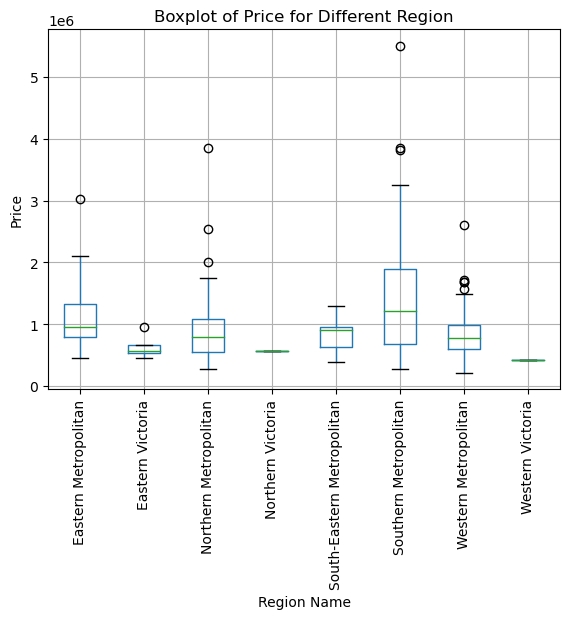

In [65]:
# Draw the boxplot of distance type by region name
df.boxplot(column='Price', by='Regionname')
plt.title("Boxplot of Price for Different Region")
plt.xticks(rotation='vertical')
plt.xlabel("Region Name")
plt.ylabel("Price")
plt.suptitle('')
plt.show()

From this boxplot, it can be observed that there are differences in housing prices among different regions. For instance, in these areas, the Southern Metropolitan region has the highest average housing prices, and there is also a significant internal variation in prices in this region.

### Room and bathroom vs. price

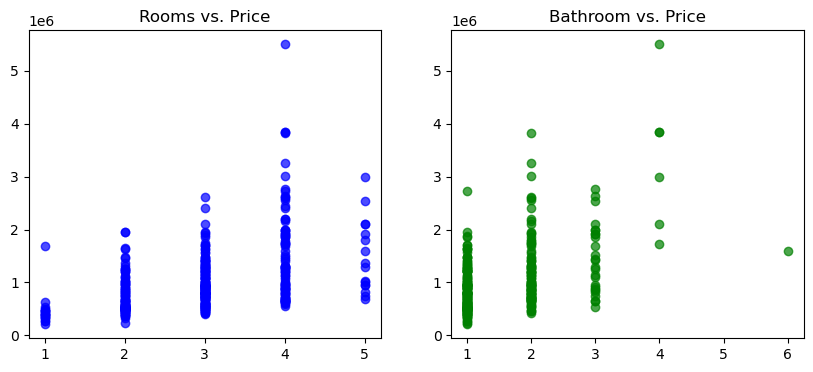

In [66]:
# Show two scatter plots together
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Draw room vs. price in the first plot
axs[0].scatter(df['Rooms'], df['Price'], color='blue', alpha=0.7)
axs[0].set_title('Rooms vs. Price')

# Draw bathroom vs. price in the first plot
axs[1].scatter(df['Bathroom'], df['Price'], color='green', alpha=0.7)
axs[1].set_title('Bathroom vs. Price')

# Show the plots
plt.show()

From these two scatter plots, it can be observed that when the number of rooms or bathrooms is between 1 and 4, the higher the count of rooms or bathrooms, the more expensive the housing prices.

### Property count vs. price

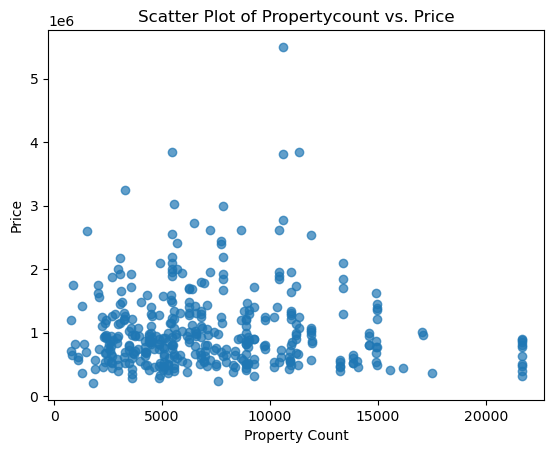

In [67]:
# Draw scatter plot of property count vs. price
plt.scatter(df['Propertycount'], df['Price'], alpha=0.7)
plt.title("Scatter Plot of Propertycount vs. Price")
plt.xlabel("Property Count")
plt.ylabel("Price")
plt.show()

According to this scatter plot, the relationship between these two variables is not obvious.

## 2. Linear Regression Model Development
### Preprocess the data

In [68]:
# Drop the rows where price is NA
df = df.dropna(subset=['Price'])

In [69]:
# Import package to fill in missing value
from sklearn.impute import SimpleImputer

In [70]:
# Fill in missing values with mean for: landsize, longtitude, lattitude, building area
imputer_mean = SimpleImputer(strategy='mean')
mean_cols = ['Landsize', 'Lattitude', 'Longtitude','BuildingArea']
df[mean_cols] = imputer_mean.fit_transform(df[mean_cols])

In [71]:
# Fill in missing values with 0 for: bathroom, car
zero_cols = ['Bathroom', 'Car']
df[zero_cols] = df[zero_cols].fillna(0)

In [72]:
# Drop bedroom2 and YearBuilt
df = df.drop(['Bedroom2','YearBuilt'],axis=1)

In [73]:
# Show the cleaned data without missing value
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,1.0,1.0,0.000000,66.000000,Darebin City Council,-37.754100,145.008800,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,1.0,1.0,545.000000,107.000000,Darebin City Council,-37.744500,144.947100,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,2.0,2.0,261.000000,144.172785,Glen Eira City Council,-37.916300,145.077900,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,0.0,0.0,525.146067,144.172785,Manningham City Council,-37.800997,144.990817,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,1.0,1.0,0.000000,144.172785,Melbourne City Council,-37.835900,144.983900,Southern Metropolitan,14887


- Since our dependent variable is Price, we drop the rows with missing values in Price.
- I fill in the missing value of landsize, longtitude, lattitude, and builidng area with their means because means make sense in these columns. 
- For the year column, I use median because there cannot be decimals in the year. 
- I fill in the missing value of bathroom and car with 0 because taking 0 for missing is better than mean in these columns.
- I drop the Bedroom2 column because it shows the same information with Room. And I drop YearBuilt because there are too many missing values in this column and I don't think it's good to replace them with mean or median value.

### Build the linear regression model

In [74]:
# Drop the columns that won't be used in the regression model
data = df.drop(['Suburb','Address','Date','Postcode'],axis=1)

In [75]:
# Use log_Price as target variable
data['log_Price'] = np.log(data['Price'])

In [76]:
# Encode dummy variables: Type, Method, Regionname, CouncilArea
data = pd.get_dummies(data, columns=['Type','Method','Regionname','CouncilArea','SellerG'],dtype=int)
data.head(5)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,...,SellerG_VICPROP,SellerG_Village,SellerG_W.B.,SellerG_William,SellerG_Williams,SellerG_Woodards,SellerG_YPA,SellerG_buyMyplace,SellerG_hockingstuart,SellerG_iTRAK
0,2,438000.0,6.5,1.0,1.0,0.000000,66.000000,-37.754100,145.008800,8870,...,0,0,0,0,0,0,0,0,0,0
1,2,901000.0,7.8,1.0,1.0,545.000000,107.000000,-37.744500,144.947100,11204,...,0,0,0,0,0,0,0,0,0,0
2,3,800000.0,13.9,2.0,2.0,261.000000,144.172785,-37.916300,145.077900,10969,...,0,0,0,0,0,1,0,0,0,0
3,3,1155000.0,12.4,0.0,0.0,525.146067,144.172785,-37.800997,144.990817,5420,...,0,0,0,0,0,0,0,0,0,0
4,3,1630000.0,3.3,1.0,1.0,0.000000,144.172785,-37.835900,144.983900,14887,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Import packages
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define dependent and independent variables
X = data.drop(['Price','log_Price'], axis=1)
y = data['log_Price']

# Adding a constant 
X = sm.add_constant(X)

# Split test 20% and train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# build a linear regression model
model_linear = sm.OLS(y_train, X_train).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     7.969
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.86e-36
Time:                        21:51:26   Log-Likelihood:                 66.545
No. Observations:                 312   AIC:                             120.9
Df Residuals:                     185   BIC:                             596.3
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -56.2212     31.508     -1.784      0.076    -118.383       5.940
Rooms                                          0.1682      0.031      5.488      0.000       0.108       0.229
Distance                                      -0.0376      0.008     -4.424      0.000      -0.054      -0.021
Bathroom                                      -0.0257      0.030     -0.855      0.394      -0.085       0.034
Car                                            0.0546      0.025      2.203      0.029       0.006       0.103
Landsize                                    4.027e-05    2.8e-05      1.441      0.151   -1.49e-05    9.54e-05
BuildingArea                                   0.0016      0.000      3.943      0.000       0.001       0.002
Lattitude                                     -0.7008      0.510     -1.374      0.171      -1.707       0.306
Longtitude                                     0.5733      0.386      1.487      0.139      -0.188       1.334
Propertycount                              -2.988e-06   5.17e-06     -0.578      0.564   -1.32e-05    7.22e-06
Type_h                                       -18.5063     10.503     -1.762      0.080     -39.227       2.214
Type_t                                       -18.7169     10.505     -1.782      0.076     -39.442       2.008
Type_u                                       -18.9980     10.500     -1.809      0.072     -39.714       1.718
Method_PI                                    -11.3492      6.297     -1.802      0.073     -23.773       1.074
Method_S                                     -11.3084      6.297     -1.796      0.074     -23.732       1.115
Method_SA                                    -10.8283      6.318     -1.714      0.088     -23.293       1.637
Method_SP                                    -11.3620      6.306     -1.802      0.073     -23.803       1.079
Method_VB                                    -11.3733      6.296     -1.806      0.072     -23.795       1.048
Regionname_Eastern Metropolitan               -7.4330      4.273     -1.740      0.084     -15.863       0.997
Regionname_Eastern Victoria                   -7.7206      4.234     -1.823      0.070     -16.074       0.633
Regionname_Northern Metropolitan              -7.7336      4.254     -1.818      0.071     -16.127       0.660
Regionname_Northern Victoria                  -4.1523      2.593     -1.602      0.111      -9.267       0.962
Regionname_South-Eastern Metropolitan         -7.4590      4.282     -1.742      0.083     -15.907       0.989
Regionname_Southern Metropolitan              -7.6218      4.266     -1.787      0.076     -16.037       0.794
Regionname_Western Metropolitan               -7.1467      3.884     -1.840      0.067

## 3. Model Evaluation
### In-sample evaluation

According to the summary table, the F-statistic of this model is 7.969 and its p-value is extremely small, so the model is overall valid. The R-squared is 0.844 and the adjusted R-squared is 0.738, which shows the fitness of the model is good. However, there might be overfitting because we are using many predict variables and the model is complicated.

### Out-of-sample evaluation

In [78]:
# Use the model on test set
y_pred = model_linear.predict(X_test)

# Import packages
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics to evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f'R^2: {r2}')
print(f'MSE: {mse}')

R^2: 0.5889125633490837
MSE: 0.15730306390811374


The OOS R-squared is 0.59, which is much smaller than the in-sampel R^2, showing the evidence of overfitting. The MSE is relatively low, showing a moderate level of prediction error for out of sample predictions.

## 4. Regularization
### Reason for regularization

According to the answer in the previous part, the in-sample performance of the model is better than the out-of-sample performance in terms of R-squared, showing that overfitting may exist in this model. Thus, we need Lasso regularization to prevent this problem by reducing the complexity of the model.

### Set up Lasso regression model

In [79]:
# Import packages
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.preprocessing import StandardScaler

# Scale all variables because Lasso is sensitive to scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Set up model on training data with a specific value of alpha
lasso = Lasso(alpha=0.001)
model_lasso = lasso.fit(X_train_scaled, y_train)

In [81]:
# Display the coefficient of lasso model
print("Lasso coefficients:", model_lasso.coef_)
print("Intercept:", model_lasso.intercept_)

Lasso coefficients: [ 0.00000000e+00  1.50603745e-01 -2.34543834e-01 -1.17304313e-02
  5.10760319e-02  2.51717859e-02  8.00281357e-02 -5.65422685e-02
  5.40198948e-02 -6.71080359e-03  1.02270334e-01 -0.00000000e+00
 -1.18417345e-01  0.00000000e+00  2.05945699e-02  3.70152933e-02
 -1.26271738e-03 -3.82657239e-03  3.99481275e-02 -0.00000000e+00
 -4.76966009e-02  5.36287887e-02  2.59209349e-02  0.00000000e+00
 -5.98991130e-04  6.39913853e-03 -4.23160276e-02  4.49432405e-02
  5.17550253e-02 -2.49358020e-02  2.22349586e-02  6.90043997e-03
  1.17828862e-02  5.21300454e-02  1.44369783e-02  9.36301414e-03
 -0.00000000e+00 -1.38336703e-02 -9.72692465e-03 -7.42135705e-03
 -0.00000000e+00 -2.19283069e-02 -1.03005182e-03  0.00000000e+00
 -0.00000000e+00  1.02868869e-03  0.00000000e+00  4.95591332e-04
 -1.18190912e-02  6.84170451e-03 -5.95695016e-03 -1.39525571e-02
  0.00000000e+00 -3.69922423e-02  9.63614933e-03  4.17666897e-03
 -9.16685713e-03  3.89609616e-03 -1.02684063e-02 -1.86779297e-02
 -1.1

In [82]:
# Calculate in-sample MSE and R^2 for Lasso regression model
y_pred_1 = lasso.predict(X_train_scaled)

# Evaluate the performance of lasso model
mse = mean_squared_error(y_train, y_pred_1)
r2 = r2_score(y_train, y_pred_1)

# Print the result
print("R^2:", r2)
print("MSE:", mse)

R^2: 0.843092023015113
MSE: 0.03854328381217577


- I choose alpha = 0.001 by adjusting its value multiple times. I start with 0.01 and gradually decrease its value, allowing more coefficients to remain non-zero. I found the largest R^2 and the smallest MSE when alpha = 0.001.
- We can see from the coefficient results that part of them turn into 0 in the lasso model because they are less important when explaining the variance of dependent variable.
- The in-sample R^2 is 0.843, showing a good fitness of the model. The MSE is 0.03 which is very low. Thus, in terms of in sample performance, lasso regression model is as good as or even better than the in-sample performance of linear regression.

### Perform Lasso regression on both training and test data

In [84]:
# Fit the lasso model on test data
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the performance of lasso model
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

# Print the result
print("R^2:", r2)
print("MSE:", mse)

R^2: 0.6979720421782751
MSE: 0.11557133328696674


### How the result change: Linear regression vs. Lasso regression

- Comparing the OOS performance of Lasso regression model with linear regression model, we find that the R^2 is 0.698 which is larger than 0.589. And the MSE is about 0.116, which is smaller than 0.157.
- Thus, the Lasso regression model performs better on the test set than the linear regression model. By adding penalty into the model, Lasso regression model excludes useless independent variables and simplify the model to prevent overfitting. Thus, it can provide better out-of-sample prediction.

## 5. Out-of-Sample Performance
### Develop new train and test sets and regression models

In [85]:
# Re-split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [86]:
# Newly train (fit) the linear regression model on the training data
model_linear = sm.OLS(y_train, X_train).fit()

# Summary the linear regression model
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     7.713
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.42e-35
Time:                        21:54:45   Log-Likelihood:                 42.391
No. Observations:                 312   AIC:                             169.2
Df Residuals:                     185   BIC:                             644.6
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -33.2065     35.030     -0.948      0.344    -102.316      35.903
Rooms                                          0.1909      0.033      5.812      0.000       0.126       0.256
Distance                                      -0.0482      0.009     -5.233      0.000      -0.066      -0.030
Bathroom                                       0.0169      0.031      0.547      0.585      -0.044       0.078
Car                                            0.0330      0.025      1.314      0.191      -0.017       0.083
Landsize                                    5.706e-05   3.03e-05      1.883      0.061   -2.71e-06       0.000
BuildingArea                                   0.0014      0.000      3.284      0.001       0.001       0.002
Lattitude                                     -0.4451      0.558     -0.798      0.426      -1.545       0.655
Longtitude                                     0.3694      0.434      0.851      0.396      -0.487       1.226
Propertycount                               3.305e-06   5.77e-06      0.572      0.568   -8.08e-06    1.47e-05
Type_h                                       -10.8378     11.679     -0.928      0.355     -33.878      12.202
Type_t                                       -11.0113     11.677     -0.943      0.347     -34.049      12.027
Type_u                                       -11.3574     11.674     -0.973      0.332     -34.389      11.675
Method_PI                                     -6.6848      7.000     -0.955      0.341     -20.495       7.126
Method_S                                      -6.6721      7.002     -0.953      0.342     -20.487       7.143
Method_SA                                     -6.2853      7.020     -0.895      0.372     -20.135       7.564
Method_SP                                     -6.7981      7.009     -0.970      0.333     -20.626       7.029
Method_VB                                     -6.7663      7.006     -0.966      0.335     -20.589       7.056
Regionname_Eastern Metropolitan               -4.4569      4.866     -0.916      0.361     -14.058       5.144
Regionname_Eastern Victoria                   -3.6148      3.784     -0.955      0.341     -11.080       3.851
Regionname_Northern Metropolitan              -4.7701      4.849     -0.984      0.327     -14.336       4.796
Regionname_Northern Victoria                  -2.1825      2.947     -0.741      0.460      -7.996       3.631
Regionname_South-Eastern Metropolitan         -4.5750      4.871     -0.939      0.349     -14.184       5.034
Regionname_Southern Metropolitan              -4.7362      4.854     -0.976      0.330     -14.312       4.840
Regionname_Western Metropolitan               -4.4721      4.515     -0.990      0.323

In [87]:
# Scale all independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Newly train (fit) the lasso regression model on the training data
lasso = Lasso(alpha=0.001)
model_lasso = lasso.fit(X_train_scaled, y_train)

# Display coefficients of the new lasso regression model
print("Lasso coefficients:", model_lasso.coef_)
print("Intercept:", model_lasso.intercept_)

Lasso coefficients: [ 0.00000000e+00  1.71397250e-01 -2.70815126e-01  1.85394598e-02
  3.66656932e-02  3.40040495e-02  7.48189661e-02 -3.94067003e-02
  3.40513603e-02  1.00351719e-02  8.27759150e-02 -0.00000000e+00
 -1.46655885e-01  0.00000000e+00  9.76952367e-03  2.88060152e-02
 -3.18405854e-02 -1.87221908e-02  6.73167933e-02 -0.00000000e+00
 -3.26933181e-02  6.69619122e-02  2.93462029e-02  0.00000000e+00
 -2.77139202e-02 -0.00000000e+00 -6.23236599e-02  9.05738344e-02
  5.20377362e-02 -1.28086358e-02  0.00000000e+00  1.77352320e-02
 -0.00000000e+00  5.91216148e-02  2.39411018e-02  4.05599732e-02
  1.03950899e-02 -1.30693809e-02  0.00000000e+00 -1.96314433e-02
 -1.68700476e-02 -4.18206841e-02  0.00000000e+00  1.64906404e-02
  1.70153621e-02  9.95244652e-04  2.77517462e-03 -0.00000000e+00
 -2.07159372e-02  2.78589087e-02 -1.81415038e-03 -1.99224118e-02
  1.70831865e-03 -2.46816195e-02 -1.73508848e-03  5.64117608e-05
 -5.22523944e-03  5.58983034e-03 -1.00173684e-02 -2.08994199e-02
 -1.1

### Estimate AIC, AICc, BIC for both models using only the training data

In [88]:
# Extract and calculate AIC, AICc, BIC for linear regression model
results = sm.OLS(y_train, X_train).fit()
aic = results.aic
aicc = results.aic - (2 * (results.df_model + 1) / (len(X_train) - results.df_model - 2))
bic = results.bic

# Print the result
print(f'AIC_linear: {aic}')
print(f'AICc_linear: {aicc}')
print(f'BIC_linear: {bic}')

AIC_linear: 169.21832376523253
AICc_linear: 167.83788898262384
BIC_linear: 644.5797286170368


In [89]:
# In-sample prediction with lasso model
y_pred = lasso.predict(X_train_scaled)

# Calculate residual
rss = np.sum((y_train - y_pred) ** 2)
n = len(y_train)
k = X_train_scaled.shape[1] + 1

# Calculate AIC, AICc, BIC for lasso regression model
aic = n * np.log( rss / n ) + 2 * k
aicc = n * np.log( rss / n ) + 2 * k + (2 * k * (k + 1)) / (n - k - 1)
bic = n * np.log( rss / n  ) + k * np.log(n)

# Print the result
print(f'AIC_lasso: {aic}')
print(f'AICc_lasso: {aicc}')
print(f'BIC_lasso: {bic}')

AIC_lasso: -685.2843951280246
AICc_lasso: -449.731453951554
BIC_lasso: -157.52094564688753


### OOS AIC, AICc, BIC

In [90]:
# Out-of-sample prediction with linear model
y_pred = model_linear.predict(X_test)

# Calculate residual
rss = np.sum((y_test - y_pred) ** 2)
n = len(y_test)
k = X_test_scaled.shape[1] + 1

# Calculate AIC, AICc, BIC for lasso regression model
aic = n * np.log( rss / n ) + 2 * k
aicc = n * np.log( rss / n ) + 2 * k + (2 * k * (k + 1)) / (n - k - 1)
bic = n * np.log( rss / n  ) + k * np.log(n)

# Print the result
print(f'AIC_linear: {aic}')
print(f'AICc_linear: {aicc}')
print(f'BIC_linear: {bic}')

AIC_linear: 115.27957436377221
AICc_linear: -520.3394732552754
BIC_linear: 449.3717215616223


In [91]:
# Out-of-sample prediction with lasso model
y_pred = lasso.predict(X_test_scaled)

# Calculate residual
rss = np.sum((y_test - y_pred) ** 2)
n = len(y_test)
k = X_test_scaled.shape[1] + 1

# Calculate AIC, AICc, BIC for lasso regression model
aic = n * np.log( rss / n ) + 2 * k
aicc = n * np.log( rss / n ) + 2 * k + (2 * k * (k + 1)) / (n - k - 1)
bic = n * np.log( rss / n  ) + k * np.log(n)

# Print the result
print(f'AIC_lasso: {aic}')
print(f'AICc_lasso: {aicc}')
print(f'BIC_lasso: {bic}')

AIC_lasso: 80.83807646108352
AICc_lasso: -554.7809711579641
BIC_lasso: 414.9302236589336


### Comparison of in-sample and out-of-sample ICs
- For linear regression model, IS AIC (169.22) is most similar to true OOS AIC (115.28).
- For lasso regression model, IS AICc (-449.73) is most similar to true OOS AICc (-554.78).

### 5-folds CV for both models using only the training data

In [92]:
#Import packages
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

In [93]:
# 5-fold cv for linear model
kf = KFold(n_splits = 5, shuffle = True, random_state= 1)
linear_MSE = cross_val_score(LinearRegression(), X_train, y_train, cv = kf, scoring = make_scorer(mean_squared_error))
linear_MSE = np.mean(linear_MSE)

print(f'5-Fold Cross-Validation MSE for Linear Regression: {linear_MSE}')

5-Fold Cross-Validation MSE for Linear Regression: 0.13437891684944514


In [94]:
# 5-fold cv for lasso model
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
lasso_MSE = cross_val_score(model_lasso, X_train_scaled, y_train, cv = kf, scoring = make_scorer(mean_squared_error))
lasso_MSE = np.mean(lasso_MSE)

print(f'5-Fold Cross-Validation MSE for Lasso Regression: {lasso_MSE}')

5-Fold Cross-Validation MSE for Lasso Regression: 0.12389335344245292


### Estimate the models true OOS performance by computing their deviance on the test data

In [95]:
# Linear regression model
y_pred = model_linear.predict(X_test)

# Calculate deviance which is Residual Sum of Squares (RSS)
deviance = np.sum((y_test - y_pred) ** 2)

# Calculate true out of sample MSE
mse = mean_squared_error(y_test, y_pred)

# Print the result
print(f'deviance_linear: {deviance}')
print(f'OOS_mse_linear: {mse}')

deviance_linear: 9.574111316213475
OOS_mse_linear: 0.12119128248371487


In [96]:
# Lasso regression model
y_pred = model_lasso.predict(X_test_scaled)

# Calculate deviance which is Residual Sum of Squares (RSS)
deviance = np.sum((y_test - y_pred) ** 2)

# Calculate true out of sample MSE
mse = mean_squared_error(y_test, y_pred)

# Print the result
print(f'deviance_lasso: {deviance}')
print(f'OOS_mse_lasso: {mse}')

deviance_lasso: 6.190986165681126
OOS_mse_lasso: 0.07836691348963451


### Comparison of MSE
- Linear regression model: IS MSE 0.134; OOS MSE 0.121
- Lasso regression model: IS MSE 0.124; OOS MSE 0.078
- In terms of IS MSE, the difference between two models is not significant. However for OOS MSE, Lasso regression model has smaller value, showing its better OOS performance.

### Comparison of R-squared

In [97]:
# Linear Regression model: IS R^2
r2_IS = model_linear.rsquared

# Linear Regression model: OOS R^2
y_pred = model_linear.predict(X_test)
r2_OOS = r2_score(y_test, y_pred)

# Print the results
print(f'R^2_IS: {r2_IS}')
print(f'R^2_OOS: {r2_OOS}')

R^2_IS: 0.8400893394050047
R^2_OOS: 0.5187582829559745


In [98]:
# Lasso Regression model: IS R^2
y_pred_1 = lasso.predict(X_train_scaled)
r2_IS = r2_score(y_train, y_pred_1)

# Lasso Regression model: OOS R^2
y_pred_2 = lasso.predict(X_test_scaled)
r2_OOS = r2_score(y_test, y_pred_2)

# Print the result
print(f'R^2_IS: {r2_IS}')
print(f'R^2_OOS: {r2_OOS}')

R^2_IS: 0.8385883395341359
R^2_OOS: 0.6888107194322324


- Linear regression model: IS R^2 0.84; OOS R^2 0.53
- Lasso regression model: IS R^2 0.84; OOS R^2 0.69
- For these two models, in-sample R^2s are similar while the OOS R^2 of the lasso regression model is larger then the OOS R^2 of the linear regression model. This conclusion is consistent with what we have got in Q3 and Q4.